## Gridding the lipid bilayer

The memsys_leaflet_gridding.py module provides classes and functionality to build lipid grids, which is based on the GridMAT-MD analysis (http://www.bevanlab.biochem.vt.edu/GridMAT-MD/). 

The lipid grids are built from frames of the COM trajectory. 

Let's give it a try using our test system. 

In [22]:
#import everything
import MemSys as ms
import MDAnalysis as mda
import memsys_leaflet_gridding as lg
import plot_generation_functions as pgf
%matplotlib inline

In [84]:
#build the MDAnalysis universe
u = mda.Universe('./test_system/mem2.psf', './test_system/mem2_1_fr10.dcd')
# select the bilayer
bilayer = u.select_atoms("not resname CLA and not resname TIP3 and not resname POT")
# build the COM trajectory
com_traj = ms.MemSys(u.trajectory, bilayer, frame_path='./test_system/test_output/', frame_save=True)

doing frame  0
time  0.0
doing frame  1
time  0.04888821
doing frame  2
time  0.09777642
doing frame  3
time  0.14666463
doing frame  4
time  0.19555284
doing frame  5
time  0.24444105
doing frame  6
time  0.29332926
doing frame  7
time  0.34221747
doing frame  8
time  0.39110568
doing frame  9
time  0.43999389


Now that we have the COM trajectory, we can start building the lipid grids. Let's just build some grids for the first frame in our COM trajectory.  

In [7]:
#get the first frame of COM trajectory
frame_0 = com_traj.frame[0]

The object we will use to contruct the grids from the com_traj frame  the is LeafletGrids from the memsys_leaflet_gridding module. 

In [9]:
leafgrids = lg.LeafletGrids(frame_0, com_traj.leaflets, com_traj.plane, nxbins=50, nybins=50)

The object takes the frame, the 'leaflets' member of the COM trajectory, and the 'plane' member variable of the COM trajectory. It also has the optional arguments for 'nxbins' and 'nybins' which determine the resolution of the gridding procedure: The defaults number of bins is 50 for both dimensions. The LeafletGrids object builds two grids across the box dimensions in the bilayer's lateral plane (from com_traj.plane); one for the 'upper' and one for the 'lower' leaflet.  

The underlying grid objects can be pulled from the 'leaflets' dictionary of the LeafletGrids object (with keys 'upper' and 'lower'), 

In [10]:
print leafgrids.leaflets['upper']
print leafgrids.leaflets['lower']

<memsys_leaflet_gridding.LipidGrid_2d instance at 0x7f6209bc6f80>
<memsys_leaflet_gridding.LipidGrid_2d instance at 0x7f6209bc6908>


which stores instances of the LipidGrid_2d class. This object stores the actual grid, grid centers, etc.

In [11]:
# the centers of the grid points in the the 'x' dimension of the 'upper' leaflet.
print leafgrids.leaflets['upper'].x_centers

[   1.49278458    4.47835373    7.46392288   10.44949203   13.43506119
   16.42063034   19.40619949   22.39176865   25.3773378    28.36290695
   31.3484761    34.33404526   37.31961441   40.30518356   43.29075272
   46.27632187   49.26189102   52.24746017   55.23302933   58.21859848
   61.20416763   64.18973679   67.17530594   70.16087509   73.14644424
   76.1320134    79.11758255   82.1031517    85.08872086   88.07429001
   91.05985916   94.04542831   97.03099747  100.01656662  103.00213577
  105.98770493  108.97327408  111.95884323  114.94441238  117.92998154
  120.91555069  123.90111984  126.886689    129.87225815  132.8578273
  135.84339645  138.82896561  141.81453476  144.80010391  147.78567307]


In [12]:
# the centers of the grid points in the the 'y' dimension of the 'upper' leaflet. 
print leafgrids.leaflets['upper'].y_centers

[   1.49278458    4.47835373    7.46392288   10.44949203   13.43506119
   16.42063034   19.40619949   22.39176865   25.3773378    28.36290695
   31.3484761    34.33404526   37.31961441   40.30518356   43.29075272
   46.27632187   49.26189102   52.24746017   55.23302933   58.21859848
   61.20416763   64.18973679   67.17530594   70.16087509   73.14644424
   76.1320134    79.11758255   82.1031517    85.08872086   88.07429001
   91.05985916   94.04542831   97.03099747  100.01656662  103.00213577
  105.98770493  108.97327408  111.95884323  114.94441238  117.92998154
  120.91555069  123.90111984  126.886689    129.87225815  132.8578273
  135.84339645  138.82896561  141.81453476  144.80010391  147.78567307]


The underlying grid is a nxbins\*nybins numpy array (of int) that stores the resid of the lipid assined to that grid point. 

In [13]:
print leafgrids.leaflets['upper'].lipid_grid

[[296 296 296 ..., 295 295 295]
 [295 296 296 ..., 295 295 295]
 [295 296 296 ..., 295 295 295]
 ..., 
 [279 279 279 ..., 286 286 286]
 [279 279 279 ..., 286 286 286]
 [296 296 296 ..., 286 286 295]]


So now that we have our grid objects, and we've seen a little of the underlying structure, let's do something with our grids. 



#### Lipid maps

The first cool thing we can do is generate a grid map of one of our lipids. We start by assigning the colors we want use with a dictionary (we need to know the types of the lipids.) 

In [14]:
# Assign colors using a dictionary
type_color = {'POPC':'blue', 'DOPE':'green','TLCL2':'red'}

Next we will use the GetXYZC function to pull out the data we need to generate the 2d map. We'll pass in our type_color dictionary.

In [17]:
# Do the upper leaflet
#Get the data we need for plotting -- pass in the 'type_color' dictionary
leaflet_xyzc = leafgrids.GetXYZC(leaflet='upper', color_type_dict=type_color)

The GetXYZC function returns a dictionary keyed with the leaflets we passed in. The default will contain both. Since we just used the 'upper' leaflet we only have one key.

In [19]:
print leaflet_xyzc
print " "
print leaflet_xyzc.keys()

{'upper': (array([   1.49278458,    1.49278458,    1.49278458, ...,  147.78567307,
        147.78567307,  147.78567307]), array([   1.49278458,    4.47835373,    7.46392288, ...,  141.81453476,
        144.80010391,  147.78567307]), array([ 13.04568896,  13.04568896,  13.04568896, ...,   9.31354547,
         9.31354547,  10.35455229]), array(['r', 'r', 'r', ..., 'r', 'r', 'b'], 
      dtype='|S1'))}
 
['upper']


Now we can use the template plotting function 'plot_grid_as_scatter' from the plot_generation_functions module to make our map plot. 

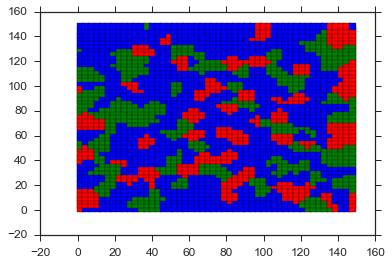

In [24]:
pgf.plot_grid_as_scatter(leaflet_xyzc['upper'], save=False, show=True)

Now we have a nice visualization of the areas occuppied by the different lipid types in this leaflet. We can use this grid to estimate the area per lipid for this frame. 

Let's go ahead and do the other leaflet too.

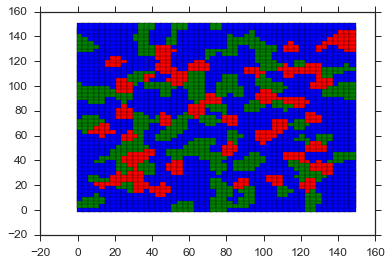

In [85]:
# Do the upper leaflet
#Get the data we need for plotting -- pass in the 'type_color' dictionary
leaflet_xyzc_lower = leafgrids.GetXYZC(leaflet='lower', color_type_dict=type_color)
pgf.plot_grid_as_scatter(leaflet_xyzc_lower['lower'], save=False, show=True)

#### Area per lipid
We can use the 'AreaPerLipid' function to get these esitmates.

In [25]:
apls = leafgrids.AreaPerLipid()

The output is a tuple of length three.

In [27]:
print len(apls)

3


The first element of the area per lipid output is a global average area per lipid (the composite for all lipids). 


In [28]:
print apls[0]

74.2801930529


The second element of the output tuple is a dictionary with the averages of each lipid type. 

In [32]:
print apls[1]
print "--------"
print "DOPE:"
print apls[1]['DOPE']

{'POPC': (73.91530789399522, 30.34012859748151), 'TLCL2': (85.372701882077266, 36.002770985041863), 'DOPE': (69.08057953915187, 27.37822183076889)}
--------
DOPE:
(69.08057953915187, 27.37822183076889)


Each lipid type has an average area per lipid with a standard deviation; the average is over each lipid of that type assigned to the grids. (However, to get the best estimate we would do this across the trajectory and time average the values.) The final element of the AreaPerLipid output tuple is a dictionary containing all the indivual areas of lipids assigned on the grids. 


In [34]:
print apls[2][0]

80.2226084971


#### Bilayer thickness and mapping quantities onto the grid.

Another powerful analyisis and visulation tool we take advantage of with the lipid grids is mapping quantities onto the grid. 

An estimate of the bilayer thickness is a good candidate for this type of analysis. We can start by generating a corresponding thickness grid using the 'ThicknessGrid' function.

In [35]:
#generate a thickness grid, corresponding to the grid points of our lipid/leaflet grids
thick_grid = leafgrids.ThicknessGrid()

Now we can generate the data we need for plotting a thickness map using the 'GetXYZC' function.

In [36]:
# We can pass the 'lower' leaflet, but it doesn't matter. The importpant part 
# passing in the thickness grid using the 'color_grid' input. 
thick_xyzc = leafgrids.GetXYZC(leaflet='lower', color_grid=thick_grid)['lower']

Now we make our plot.

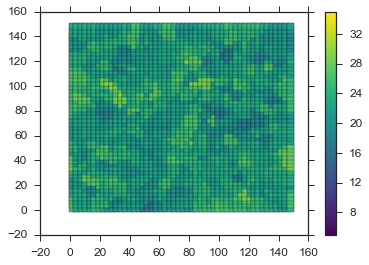

In [37]:
pgf.plot_grid_as_scatter(thick_xyzc, save=False, show=True, colorbar=True, vmin=5.0, vmax=35.0)

And we get a nice 2d heat map of the thickness estimates across the the bilayer.  

In principle, we could map any quantity of interest to the grids. The 'MapToGrid' function of LeafletGrids object is provided to facilitate mapping quantities onto the grid. The mapping with that fucntion requires a dictionary keyed by the lipid indices (from the com_traj frame) containing the value associated with that lipid. For example, we can map the area per lipid values using one of the outputs of the 'AreaPerLipid' function. 

In [39]:
#The third element of the AreaPerLipid output tuple is dictionary of the correct type for mapping. 
apl_grids = leafgrids.MapToGrid(apls[2], leaflet='both')

Again we can generate the plottable data using 'GetXYZC'.

In [42]:
#get the values for the upper leaflet
apl_grid_xyzc_upper = leafgrids.GetXYZC(leaflet='upper', color_grid=apl_grids['upper'])['upper']
#get the values for the lower leaflet
apl_grid_xyzc_lower = leafgrids.GetXYZC(leaflet='lower', color_grid=apl_grids['lower'])['lower']

And now we can make the plots.

upper leaflet:


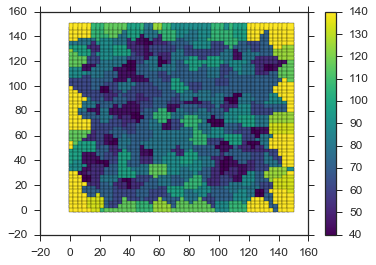

 
lower leaflet:


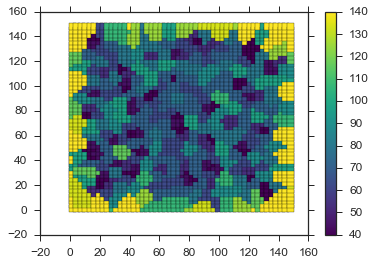

In [49]:
print "upper leaflet:"
pgf.plot_grid_as_scatter(apl_grid_xyzc_upper, save=False, show=True, colorbar=True, vmin=40.0, vmax=140.0)
print " "
print "lower leaflet:"
pgf.plot_grid_as_scatter(apl_grid_xyzc_lower, save=False, show=True, colorbar=True, vmin=40.0, vmax=140.0)

#### Building time series of measurements

We can also build the timeseries of the area per lipid and the thickness estimates. To do this we simply need to loop over the frames in the COM trajectory.

##### Area per lipid
Let's start with the area per lipid.


In [75]:
# list of lipid types -- using the resnames
group_list = ['DOPE','POPC','TLCL2']
#build an empty dictionary of lists to store timeseries values
apl_per_type = {}
for group in group_list:
    apl_per_type[group] = []
#list to store the simulation times
simtime = []
# loop over frames in the com trajectory    
for i in xrange(0,com_traj.nframes):
    print "Doing frame ", i
    #get the current frame
    com_frame = com_traj.frame[i]
    # add the simulation time
    simtime.append(com_frame.time)
    #build the grids
    leafgrids = lg.LeafletGrids(com_frame, com_traj.leaflets, com_traj.plane, nxbins=50, nybins=50)
    #compute the apls
    apls = leafgrids.AreaPerLipid()
    print apls[1]
    # get the apl values for the lipid types in our list and add to the time series
    for group in group_list:
        apl_per_type[group].append(apls[1][group][0]) 
        



Doing frame  0
{'POPC': (73.91530789399522, 30.34012859748151), 'TLCL2': (85.372701882077266, 36.002770985041863), 'DOPE': (69.08057953915187, 27.37822183076889)}
Doing frame  1
{'POPC': (73.890487360599366, 30.179148684060149), 'TLCL2': (84.324545568717852, 36.03238326842115), 'DOPE': (70.447815707333746, 27.404868544977667)}
Doing frame  2
{'POPC': (74.380634397002481, 30.69878694415064), 'TLCL2': (84.259881708794794, 33.094202324345773), 'DOPE': (68.344597210981647, 27.086977331934992)}
Doing frame  3
{'POPC': (74.269572430193307, 30.350696564774864), 'TLCL2': (83.786907053564747, 33.575376728943858), 'DOPE': (68.892084986697242, 23.569931177831336)}
Doing frame  4
{'POPC': (74.580491141578293, 29.65271074925219), 'TLCL2': (82.800524279995756, 33.819640249941905), 'DOPE': (69.4313207232385, 27.974702926857976)}
Doing frame  5
{'POPC': (75.18748830075846, 30.185304879487994), 'TLCL2': (83.349356815187051, 35.074660807286001), 'DOPE': (68.387487340913111, 25.982276651793114)}
Doing fr

In [79]:
#convert our lists to numpy arrays for plotting
import numpy as np

simtime = np.array(simtime)
for group in group_list:
    apl_per_type[group] = np.array(apl_per_type[group])

#use the helper function GenRunningAverage to convert the time series to 
# to running time averages. 
for group in group_list:
    apl_per_type[group] = ms.GenRunningAverage(apl_per_type[group][:])
# now build a list of data for the plotting function
apl_input_list = []
for group in group_list:
    apl_in = np.zeros((len(apl_per_type[group]), 4))
    apl_in[:,0] = simtime[:]
    apl_in[:,2] = apl_per_type[group][:,0]
    apl_in[:,3] = apl_per_type[group][:,1]
    apl_input_list.append(apl_in)
    print apl_in

[[  0.00000000e+00   0.00000000e+00   6.90805795e+01   0.00000000e+00]
 [  4.88882100e-02   0.00000000e+00   6.97641976e+01   9.66781966e-01]
 [  9.77764200e-02   0.00000000e+00   6.92909975e+01   1.06728103e+00]
 [  1.46664630e-01   0.00000000e+00   6.91912694e+01   8.93966065e-01]
 [  1.95552840e-01   0.00000000e+00   6.92392796e+01   7.81605032e-01]
 [  2.44441050e-01   0.00000000e+00   6.90973143e+01   7.80800972e-01]
 [  2.93329260e-01   0.00000000e+00   6.89304095e+01   8.38476064e-01]
 [  3.42217470e-01   0.00000000e+00   6.87195572e+01   9.78916260e-01]
 [  3.91105680e-01   0.00000000e+00   6.87617162e+01   9.24385630e-01]
 [  4.39993890e-01   0.00000000e+00   6.87566179e+01   8.71668239e-01]]
[[  0.00000000e+00   0.00000000e+00   7.39153079e+01   0.00000000e+00]
 [  4.88882100e-02   0.00000000e+00   7.39028976e+01   1.75507675e-02]
 [  9.77764200e-02   0.00000000e+00   7.40621432e+01   2.76100504e-01]
 [  1.46664630e-01   0.00000000e+00   7.41140005e+01   2.48148568e-01]
 [  1

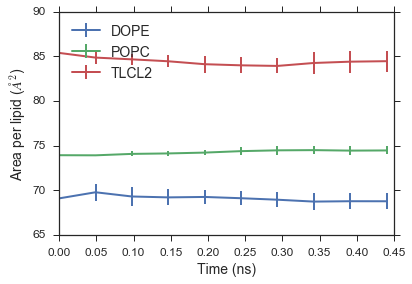

In [82]:
# now plot
pgf.plot_area_per_lipid(apl_input_list, name_list=group_list, filename='./test_system/test_output/apl_grid.eps', time_in='ns', time_out='ns', show=True)